In [2]:
#数据预处理
%matplotlib inline
import numpy as np
#import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno

#不加下面这一步进程很容易中断
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["OMP_NUM_THREADS"] = '9'  

In [ ]:
#1.img+sub 训练集&测试集 XB ROC
#2.img+sub 训练集 XB shapvalue
#5.可以画img+sub XB超越其他方法的ROC图 一张

#4.excel 画训练集bar

#3.img+sub acc等（备用img，sub

In [ ]:
# 1.img+sub 训练集&测试集 XB ROC
# 见3_model_img_sub_he下的新增代码块

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


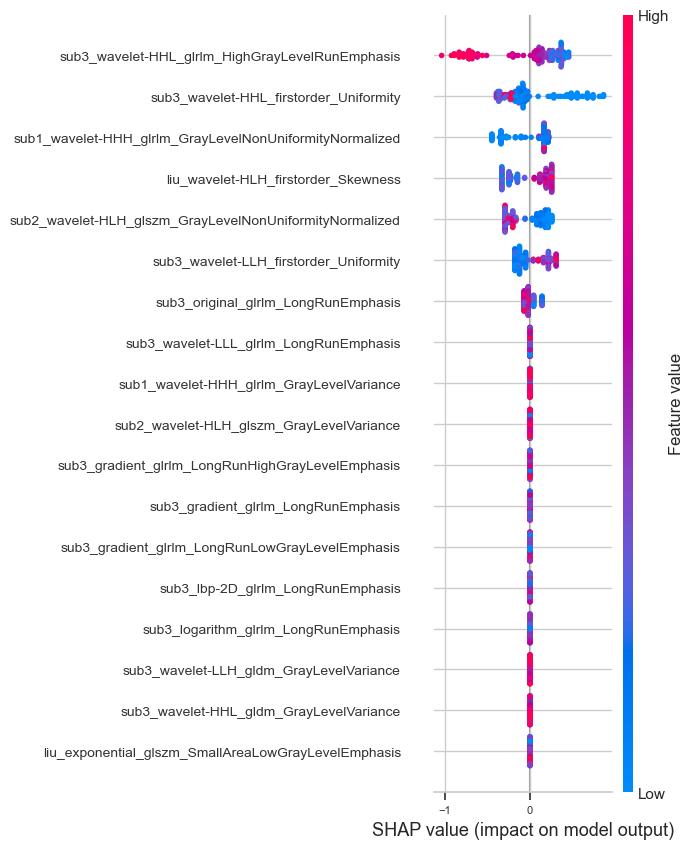

In [143]:
#2.img+sub 训练集 XB shapvalue

#读取最开始的数据
fpath="./lasso/5_train_liux_subx.xlsx"
df=pd.read_excel(fpath)

def get_data(data,name):
    train_data = data #train[0] / test[0]
    target_name = name #"y4"
    #读
    df= train_data
    features=df.columns.tolist()
    features.remove( target_name )
    y=df[ target_name ]
    X=df[features].values
    return X,y


import shap
# 创建一个示例的目标变量
X,y = get_data(df,"随访>=3")


# 训练一个模型（这里使用随机森林作为示例）
import xgboost as xgb
para = {'max_depth': 2,  'n_estimators': 7,}#'min_child_weight': 0.3, # 'scale_pos_weight': 2.4
model = xgb.XGBClassifier(**para)
model.fit(X, y)

# 初始化一个Explainer对象
explainer = shap.Explainer(model)

#-----------
df = df[df.columns.tolist()[:-1]]
##########df.columns = [str(i) for i in range(len(df.columns))]

# 计算SHAP值
shap_values = explainer.shap_values(df)

# 打印SHAP值
#print(shap_values)

# 画出汇总图


fig, ax = plt.subplots(figsize=(14, 8))
shap.summary_plot(shap_values, df, show=False, auto_size_plot=False)
#shap.summary_plot(shap_values, df, show=False, auto_size_plot=False,plot_type="bar")
# 调整坐标轴字符大小
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

# 显示图形
plt.show()

In [148]:

#读取最开始的数据
fpath="./lasso/5_train_liux_subx.xlsx"
df=pd.read_excel(fpath)

df = df[[
 'liu_wavelet-HLH_firstorder_Skewness',
 'sub1_wavelet-HHH_glrlm_GrayLevelNonUniformityNormalized',
 'sub1_wavelet-HHH_glrlm_GrayLevelVariance',
 'sub2_wavelet-HLH_glszm_GrayLevelNonUniformityNormalized',
 'sub2_wavelet-HLH_glszm_GrayLevelVariance',
 'sub3_original_glrlm_LongRunEmphasis',
 'sub3_wavelet-LLH_firstorder_Uniformity',
 'sub3_wavelet-HHL_firstorder_Uniformity',
 'sub3_wavelet-HHL_glrlm_HighGrayLevelRunEmphasis',
 'sub3_wavelet-LLL_glrlm_LongRunEmphasis',"随访>=3"]]
df = df.rename(columns={'liu_wavelet-HLH_firstorder_Skewness': 'Lesion_wavelet-HLH_firstorder_Skewness'})
df = df.rename(columns={'sub1_wavelet-HHH_glrlm_GrayLevelNonUniformityNormalized': 'Midbrain_wavelet-HHH_glrlm_GrayLevelNonUniformityNormalized'})
df = df.rename(columns={'sub1_wavelet-HHH_glrlm_GrayLevelVariance' :'Midbrain_wavelet-HHH_glrlm_GrayLevelVariance' })
df = df.rename(columns={'sub2_wavelet-HLH_glszm_GrayLevelNonUniformityNormalized' : 'Pons_wavelet-HLH_glszm_GrayLevelNonUniformityNormalized'})
df = df.rename(columns={'sub2_wavelet-HLH_glszm_GrayLevelVariance' : 'Pons_wavelet-HLH_glszm_GrayLevelVariance'})
df = df.rename(columns={'sub3_original_glrlm_LongRunEmphasis' : 'Medulla_original_glrlm_LongRunEmphasis'})
df = df.rename(columns={'sub3_wavelet-LLH_firstorder_Uniformity' : 'Medulla_wavelet-LLH_firstorder_Uniformity'})
df = df.rename(columns={'sub3_wavelet-HHL_firstorder_Uniformity' : 'Medulla_wavelet-HHL_firstorder_Uniformity'})
df = df.rename(columns={'sub3_wavelet-HHL_glrlm_HighGrayLevelRunEmphasis' : 'Medulla_wavelet-HHL_glrlm_HighGrayLevelRunEmphasis'})
df = df.rename(columns={'sub3_wavelet-LLL_glrlm_LongRunEmphasis' : 'Medulla_wavelet-LLL_glrlm_LongRunEmphasis'})

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


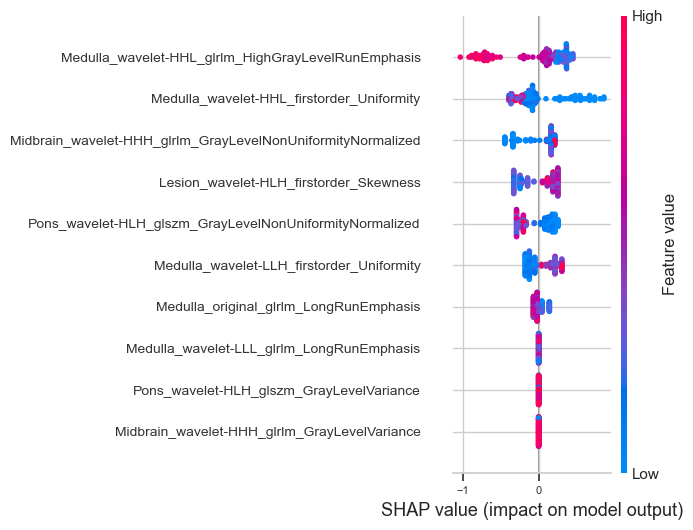

In [149]:
def get_data(data,name):
    train_data = data #train[0] / test[0]
    target_name = name #"y4"
    #读
    df= train_data
    features=df.columns.tolist()
    features.remove( target_name )
    y=df[ target_name ]
    X=df[features].values
    return X,y


import shap
# 创建一个示例的目标变量
X,y = get_data(df,"随访>=3")


# 训练一个模型（这里使用随机森林作为示例）
import xgboost as xgb
para = {'max_depth': 2,  'n_estimators': 7,}#'min_child_weight': 0.3, # 'scale_pos_weight': 2.4
model = xgb.XGBClassifier(**para)
model.fit(X, y)

# 初始化一个Explainer对象
explainer = shap.Explainer(model)

#-----------
df = df[df.columns.tolist()[:-1]]
##########df.columns = [str(i) for i in range(len(df.columns))]

# 计算SHAP值
shap_values = explainer.shap_values(df)

# 打印SHAP值
#print(shap_values)

# 画出汇总图


fig, ax = plt.subplots(figsize=(14, 8))
shap.summary_plot(shap_values, df, show=False, auto_size_plot=False)
#shap.summary_plot(shap_values, df, show=False, auto_size_plot=False,plot_type="bar")
# 调整坐标轴字符大小
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

# 显示图形
plt.show()

In [ ]:
# 5.可以画img+sub XB超越其他方法的ROC图 一张
# 见3_model_img_sub_he下的新增代码块

In [122]:
df[["score"]].max()

score    0.785712
dtype: float64

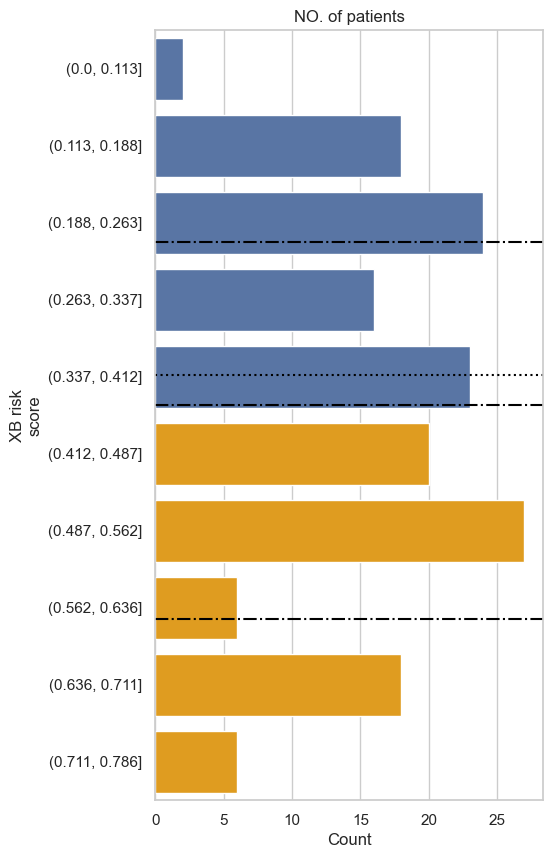

In [191]:
#4.excel 画训练集bar
fpath="./lasso_/XB score_q.csv"
df=pd.read_csv(fpath, encoding='ISO-8859-1')
df = df[["score"]]#.head(160)


# 将数据进行分箱（10分箱）

df['bins'] = pd.cut(df['score'], bins=[0,0.113106042,
0.187840038,
0.262574034,
0.337308029,
0.412042025,
0.486776021,
0.561510017,
0.636244012,
0.710978008,
0.786
])

#df['bins'] = pd.cut(df['score'], bins=[0,1/12,2/12,3/12,4/12,5/12,6/12,7/12,8/12,9/12,10/12,11/12,1])

# 设置Seaborn风格
sns.set(style="whitegrid")

# 创建一个颜色列表，前一半用一种颜色，后一半用另一种颜色
colors = ['b'] * 5 + ['orange'] * 5

# 横向柱状图
plt.figure(figsize=(5, 10))
sns.countplot(y='bins', data=df,palette=colors)#, palette="viridis"

# 添加标题和标签
plt.title('NO. of patients')
plt.xlabel('Count')
plt.ylabel('XB risk\nscore')

#num = 
# 在指定位置画垂直 Y 轴的虚线
#plt.axhline(y=0.24905178/0.786*9.5-0.95/2, color='black', linestyle='-.')
#plt.axhline(y=0.412503/0.786*9.5-0.95/2, color='black', linestyle='-.')
#plt.axhline(y=0.612655/0.786*9.5-0.95/2, color='black', linestyle='-.')
#cutoff
#plt.axhline(y=0.3936868/0.786*9.5-0.95/2, color='black', linestyle=':')
"""
plt.axhline(y=-0.4, color='red', linestyle=':')
plt.axhline(y=0, color='red', linestyle=':')
plt.axhline(y=1, color='red', linestyle=':')
plt.axhline(y=2, color='red', linestyle=':')#0.24905178
plt.axhline(y=3, color='red', linestyle=':')
plt.axhline(y=4, color='red', linestyle=':')#0.412503    0.3936868/
plt.axhline(y=5, color='red', linestyle=':')
plt.axhline(y=6, color='red', linestyle=':')
plt.axhline(y=7, color='red', linestyle=':')#0.612655
plt.axhline(y=8, color='red', linestyle=':')
plt.axhline(y=9, color='red', linestyle=':')
"""

plt.axhline(y=(0.24905178-0.188)/(0.263-0.188)*0.8+2-0.4, color='black', linestyle='-.')#0.24905178
plt.axhline(y=(0.3936868-0.377)/(0.412-0.377)*0.8+4-0.4, color='black', linestyle=':')#0.412503    0.3936868/
plt.axhline(y=(0.412503 -0.377)/(0.412-0.377)*0.8+4-0.4-0.05, color='black', linestyle='-.')#0.412503    0.3936868/
plt.axhline(y=(0.612655 -0.562)/(0.636-0.562)*0.8+7-0.4, color='black', linestyle='-.')#0.612655


# 显示图形
plt.show()

In [ ]:
#3.img+sub acc等（备用img，sub


In [150]:
fpath=r"C:\Users\pc_207\Desktop\_cm_new\data\norm_2_test_img_sub.xlsx"

df=pd.read_excel(fpath)

In [151]:
df

,ID,liu_original_shape_Elongation,liu_original_shape_Flatness,liu_original_shape_LeastAxisLength,liu_original_shape_MajorAxisLength,liu_original_shape_Maximum2DDiameterColumn,liu_original_shape_Maximum2DDiameterRow,liu_original_shape_Maximum2DDiameterSlice,liu_original_shape_Maximum3DDiameter,liu_original_shape_MeshVolume,...,sub3_wavelet-LLL_glszm_ZoneEntropy,sub3_wavelet-LLL_glszm_ZonePercentage,sub3_wavelet-LLL_glszm_ZoneVariance,sub3_wavelet-LLL_ngtdm_Busyness,sub3_wavelet-LLL_ngtdm_Coarseness,sub3_wavelet-LLL_ngtdm_Complexity,sub3_wavelet-LLL_ngtdm_Contrast,sub3_wavelet-LLL_ngtdm_Strength,随访>3,随访>=3
0,254,0.226777,0.194881,0.109635,0.044794,0.043397,0.046028,0.125822,0.040025,0.004217,...,0.00000,0.023267,0.000000,NaN,NaN,NaN,NaN,NaN,0,1
1,257,0.164008,0.179725,0.148124,0.066750,0.073526,0.076073,0.128720,0.070301,0.006178,...,0.00000,0.062233,0.000000,NaN,NaN,NaN,NaN,NaN,0,1
2,258,0.035820,0.038697,0.267844,0.444472,0.470437,0.472105,0.244676,0.468752,0.061204,...,0.00000,0.032410,0.000000,NaN,NaN,NaN,NaN,NaN,0,1
3,260,0.237696,0.240234,0.334371,0.102071,0.114288,0.117085,0.325682,0.111337,0.029484,...,0.00000,0.021172,0.000000,NaN,NaN,NaN,NaN,NaN,0,0
4,261,0.032248,0.027401,0.191364,0.425308,0.470461,0.471831,0.218050,0.468491,0.044425,...,0.00000,0.054443,0.000000,NaN,NaN,NaN,NaN,NaN,0,0
5,263,0.132799,0.117690,0.180748,0.131057,0.144502,0.146935,0.194104,0.141692,0.015413,...,0.63093,0.137350,0.172315,NaN,NaN,NaN,NaN,NaN,0,1
6,266,0.210811,0.148779,0.055390,0.040555,0.042827,0.045381,0.106343,0.039427,0.002099,...,1.00000,0.126454,0.395563,NaN,NaN,NaN,NaN,NaN,1,1
7,267,0.150834,0.179361,0.140463,0.063783,0.073526,0.075913,0.106665,0.070332,0.005283,...,0.00000,0.042377,0.000000,NaN,NaN,NaN,NaN,NaN,1,1
8,268,0.272230,0.297767,0.376718,0.088185,0.094282,0.096928,0.328598,0.091065,0.028397,...,0.00000,0.049755,0.000000,NaN,NaN,NaN,NaN,NaN,0,0
9,271,0.049519,0.059327,0.522338,0.578920,0.654317,0.654647,0.441475,0.652993,0.223451,...,0.00000,0.040770,0.000000,NaN,NaN,NaN,NaN,NaN,0,0
